In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
"""
df.Age.replace(range(18,33),"New Employee",inplace=True)
df.Age.replace(range(33,45),"Knowledgeable Employee",inplace=True)
df.Age.replace(range(45,60),"Highly-Experienced Employee",inplace=True)
df.EstimatedSalary.replace(range(15000,50000),"Base Level",inplace=True)
df.EstimatedSalary.replace(range(50000,100000),"Mid Level",inplace=True)
df.EstimatedSalary.replace(range(100000,150000),"Upper Level",inplace=True)
"""


df.Gender.replace("Female",0,inplace=True)
df.Gender.replace("Male",1,inplace=True)

In [5]:
X=df.drop(["Purchased"],axis=1)
Y=df["Purchased"]
Y=np.array(Y).reshape(-1,1)
Y.shape

(400, 1)

**Splitting the dataset into the Training set and Test set**

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=5777)

**Feature Scaling**

In [7]:
x_train

,User ID,Gender,Age,EstimatedSalary
33,15776733,0,28,44000
34,15724858,1,27,90000
186,15724402,0,20,82000
344,15729908,1,47,105000
136,15668504,0,20,82000
...,...,...,...,...
350,15800515,0,38,113000
163,15757837,1,35,38000
46,15798850,1,25,79000
110,15665416,0,39,71000


**Fitting Decision Tree Classification to the Training set**

In [8]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [9]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(x_test))

0.8166666666666667

**Making the Confusion Matrix**

In [11]:
from sklearn import metrics
confusion_matrix_train = metrics.confusion_matrix(y_train,model.predict(x_train))
confusion_matrix_train

array([[184,   0],
       [  0,  96]])

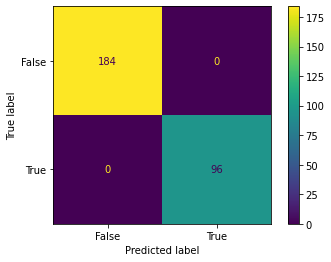

In [12]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()

In [13]:
from sklearn import metrics
confusion_matrix_test = metrics.confusion_matrix(y_test,model.predict(x_test))
confusion_matrix_test


array([[57, 16],
       [ 6, 41]])

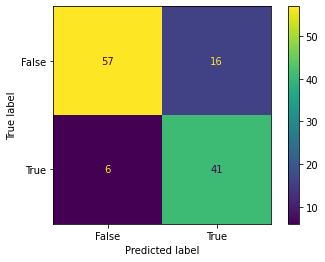

In [14]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()

**Visualising the Training set results**

In [15]:
from sklearn.tree import plot_tree

In [16]:
x_tr_small=x_train[0:40]
y_tr_small=y_train[0:40]


In [17]:
clf=model.fit(x_tr_small,y_tr_small)


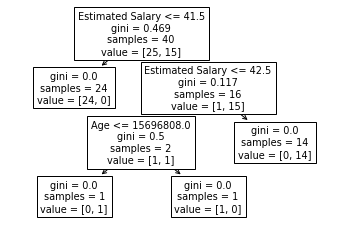

In [18]:
_=plot_tree(clf,feature_names=["Age","Gender","Estimated Salary","Purchased"])

**Visualising the Test set results**

In [19]:
x_ts_small=x_test[0:10]
y_ts_small=y_test[0:10]



In [20]:
clf=model.fit(x_ts_small,y_ts_small)

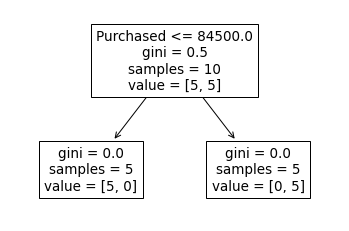

In [21]:
_=plot_tree(clf,feature_names=["Age","Gender","Estimated Salary","Purchased"])